PREPARATION DES DONNEES

In [2]:
#chargement et visualisation des premiers lignes du dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('birthdays.csv')
df.head()

,state,year,month,day,date,wday,births
0,AK,1969,1,1,1969-01-01,Wed,14
1,AL,1969,1,1,1969-01-01,Wed,174
2,AR,1969,1,1,1969-01-01,Wed,78
3,AZ,1969,1,1,1969-01-01,Wed,84
4,CA,1969,1,1,1969-01-01,Wed,824


In [3]:
#selection d'une ligne au hazard
df.sample()

,state,year,month,day,date,wday,births
69434,MN,1972,9,23,1972-09-23,Sat,142


In [4]:
#Infos sur la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372555 entries, 0 to 372554
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   state   372555 non-null  object
 1   year    372555 non-null  int64 
 2   month   372555 non-null  int64 
 3   day     372555 non-null  int64 
 4   date    372555 non-null  object
 5   wday    372555 non-null  object
 6   births  372555 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 19.9+ MB


In [5]:
#verfications des valeurs manquantes
df.isnull().sum()

state     0
year      0
month     0
day       0
date      0
wday      0
births    0
dtype: int64

In [6]:
df.isna().sum()

state     0
year      0
month     0
day       0
date      0
wday      0
births    0
dtype: int64

In [7]:
#Detection des doublons
df.duplicated().sum()

np.int64(0)

In [8]:
#verification des types de données
df.dtypes

state     object
year       int64
month      int64
day        int64
date      object
wday      object
births     int64
dtype: object

In [9]:
df['state'] = df['state'].astype('category')
df['date'] = pd.to_datetime(df['date'])
df['wday'] = df['wday'].astype('category')
df.dtypes

state           category
year               int64
month              int64
day                int64
date      datetime64[ns]
wday            category
births             int64
dtype: object

ANALYSE UNIVARIEE (EXPLORATION VARIABLE PAR VARIABLE)

ANANLYSE DES NAISSANCES

In [10]:
#statistiques descriptives
df.describe()

,year,month,day,date,births
count,372555.000000,372555.000000,372555.000000,372555,372555.000000
mean,1978.501027,6.522930,15.729637,1978-12-31 23:59:59.999999936,189.197670
min,1969.000000,1.000000,1.000000,1969-01-01 00:00:00,2.000000
25%,1974.000000,4.000000,8.000000,1974-01-01 00:00:00,52.000000
50%,1979.000000,7.000000,16.000000,1979-01-01 00:00:00,129.000000
75%,1984.000000,10.000000,23.000000,1984-01-01 00:00:00,223.000000
max,1988.000000,12.000000,31.000000,1988-12-31 00:00:00,1779.000000
std,5.766348,3.448708,8.800104,NaN,207.480407


C:\Users\HP\AppData\Local\Temp\ipykernel_13616\754945441.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


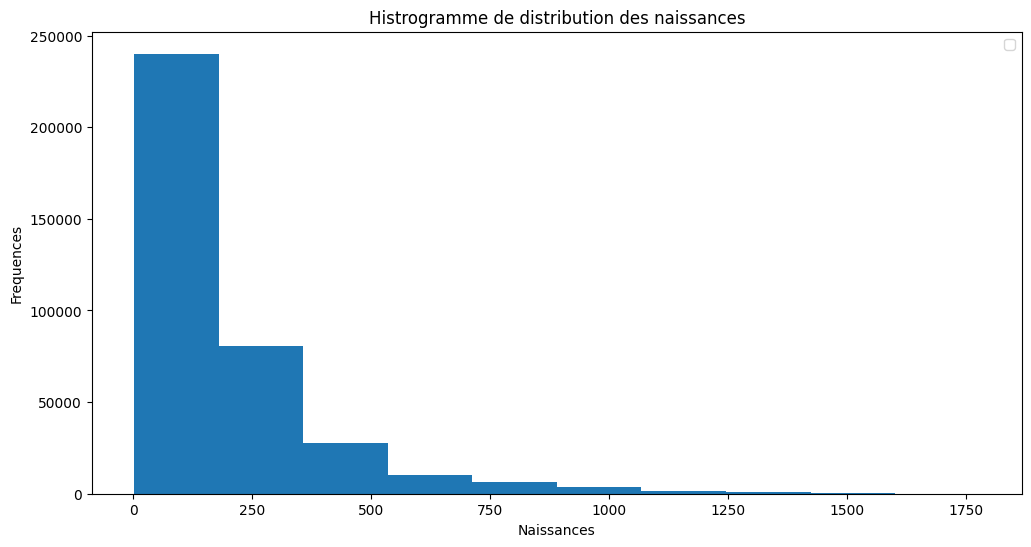

In [11]:
#Distribution des naissances
plt.figure(figsize=(12, 6))

plt.hist(df['births'])

plt.title('Histrogramme de distribution des naissances')
plt.xlabel('Naissances')
plt.ylabel('Frequences')

plt.legend()
plt.show()

In [12]:
#statistique des naissances
df['births'].describe()

count    372555.000000
mean        189.197670
std         207.480407
min           2.000000
25%          52.000000
50%         129.000000
75%         223.000000
max        1779.000000
Name: births, dtype: float64

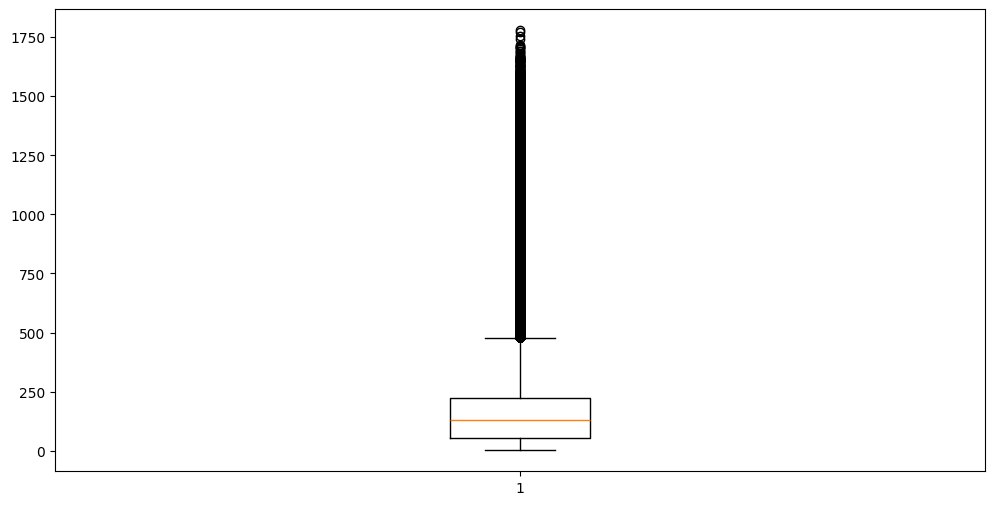

In [13]:
#Identification des valeurs extremes

plt.figure(figsize=(12, 6))

plt.boxplot(df['births'])

plt.show()

ANALYSE DES JOURS, MOIS ET ANNEES

Analyse sur les jours, mois et années

C:\Users\HP\AppData\Local\Temp\ipykernel_13616\2658590464.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day = df.groupby('wday')['births'].mean().reset_index()


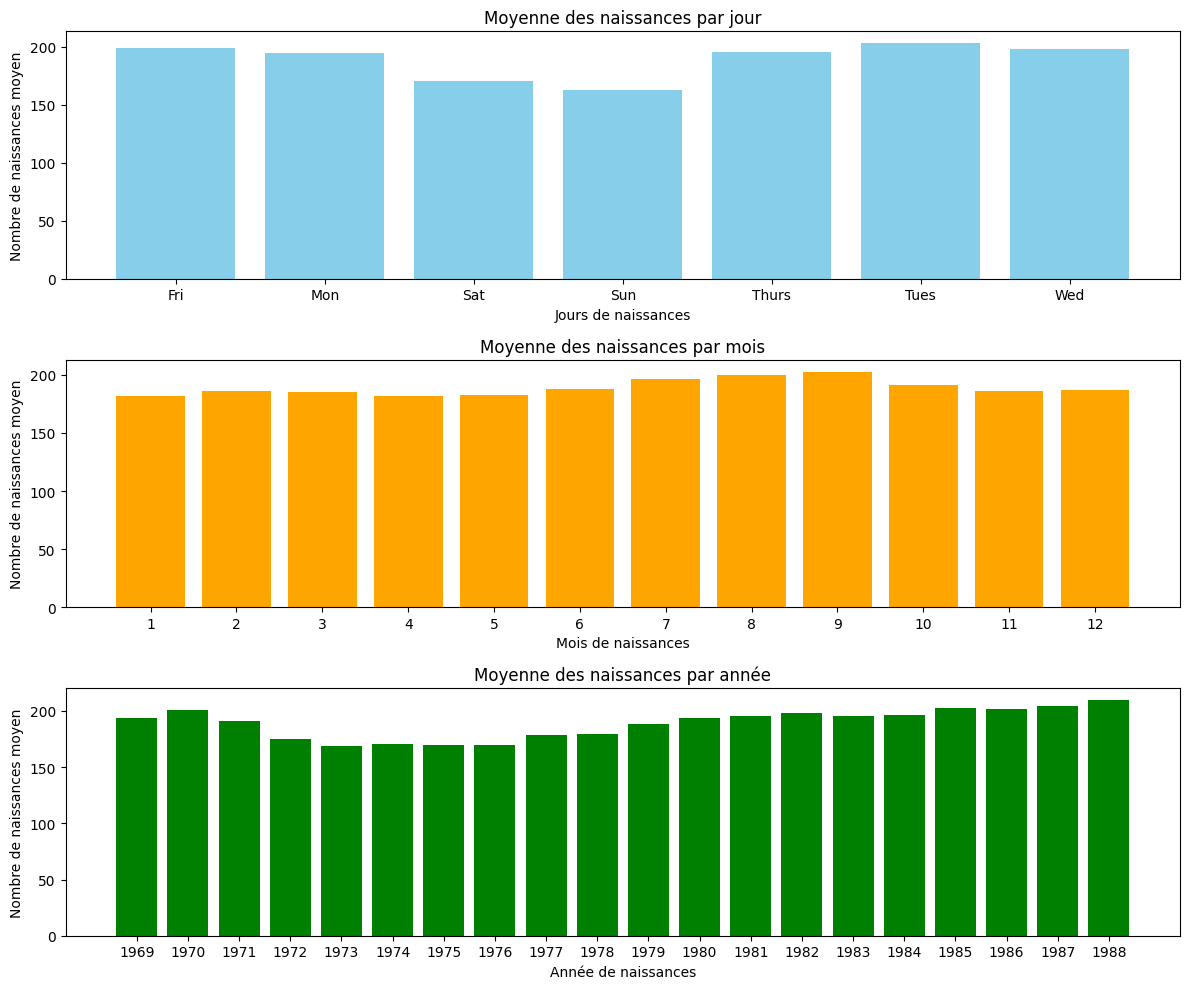

In [14]:
#Degageons les tendances saisonnieres
import seaborn as sns

day = df.groupby('wday')['births'].mean().reset_index()
month = df.groupby('month')['births'].mean().reset_index()
year = df.groupby('year')['births'].mean().reset_index()

plt.figure(figsize=(12, 10))

plt.subplot(3,1,1)
plt.bar(day['wday'], day['births'], color = 'skyblue')

plt.title('Moyenne des naissances par jour')
plt.xlabel('Jours de naissances')
plt.ylabel('Nombre de naissances moyen')

plt.subplot(3,1,2)
plt.bar(month['month'], month['births'], color = 'orange')
plt.title('Moyenne des naissances par mois')
plt.xlabel('Mois de naissances')
plt.ylabel('Nombre de naissances moyen')
plt.xticks(month['month'], month['month'])

plt.subplot(3,1,3)
plt.bar(year['year'], year['births'], color = 'green')
plt.title('Moyenne des naissances par année')
plt.xlabel('Année de naissances')
plt.ylabel('Nombre de naissances moyen')
plt.xticks(year['year'], year['year'])

plt.xticks()
plt.tight_layout()

plt.show()

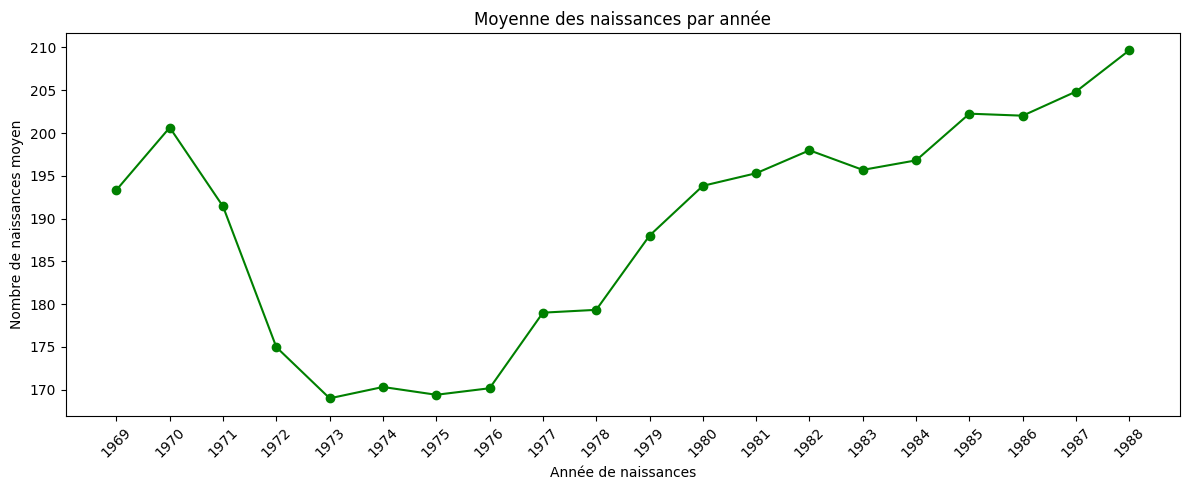

In [15]:
plt.figure(figsize=(12, 5))

plt.plot(year['year'], year['births'], color = 'green', marker='o')
plt.title('Moyenne des naissances par année')
plt.xlabel('Année de naissances')
plt.ylabel('Nombre de naissances moyen')

plt.xticks(year['year'], # Utilise toutes les années comme positions
           year['year'], # Utilise ces mêmes années comme labels
           rotation=45,   # Rotation pour une meilleure lisibilité
)
plt.tight_layout()
plt.show()

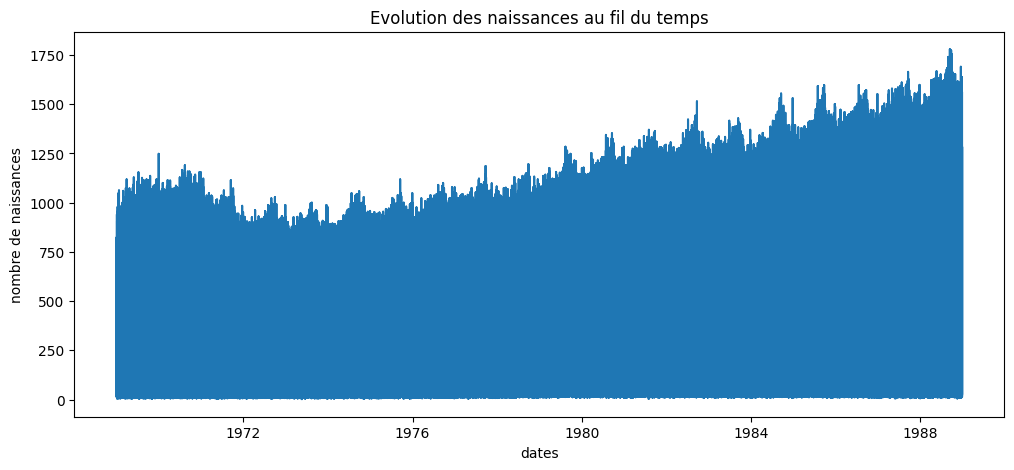

In [21]:
#Evolution des naissances dans le temps

plt.figure(figsize = ((12, 5)))

plt.plot(df['date'], df['births'])

plt.title('Evolution des naissances au fil du temps')
plt.xlabel('dates')
plt.ylabel('nombre de naissances')

plt.show()

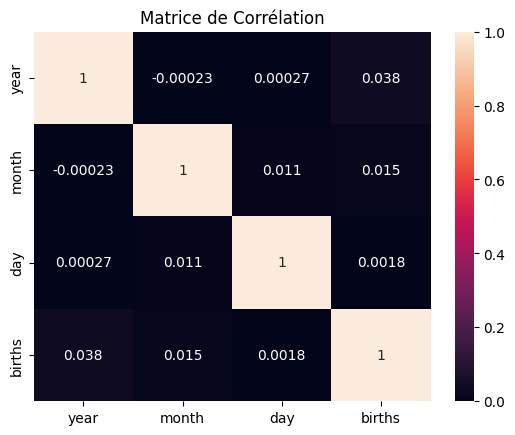

In [24]:
import seaborn as sns

# Créer une matrice de corrélation
corr = df[['year', 'month', 'day', 'births']].corr()

# Afficher le heatmap
sns.heatmap(corr, annot=True)
plt.title('Matrice de Corrélation')
plt.show()


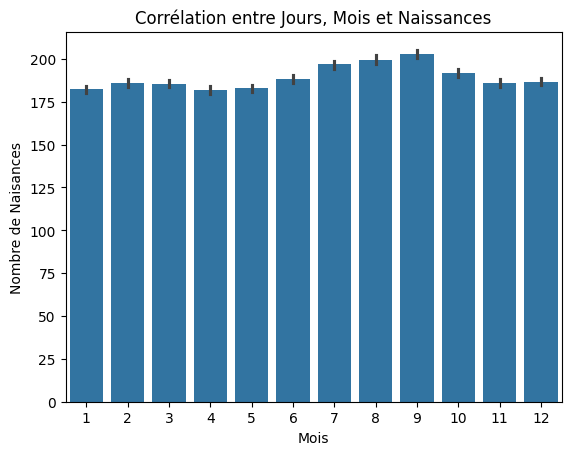

In [27]:
sns.barplot(x='month', y='births', data=df)
plt.title('Corrélation entre Jours, Mois et Naissances')
plt.xlabel('Mois')
plt.ylabel('Nombre de Naisances')
plt.show()